# 🚘 💵 HW4 Lab: Used cars and linear regression

<img src="https://github.com/joshuagrossman/mse125-labs-public/blob/main/hw4/img/cars.jpeg?raw=1" alt= “cars” width="500" />

## ✅ Setup and data import
In this lab, we'll explore correlation, simple regression, multiple regression, and confidence intervals with used car data from [Edmunds.com](https://edmunds.com). Our goal will be to predict the price of used cars using the features of each car.

In [20]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.precision", 3)         # 3 decimal places
pd.set_option("display.float_format", "{:.3f}".format)


sns.set_theme(style="whitegrid")


plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["font.size"] = 20


url = "https://jdgrossman.com/assets/used-cars.tsv"
cars = pd.read_csv(url, sep="\t")


cars.sample(10)

,type,year,make,model,trim,mileage,price
969,USED,2011,Infiniti,G Sedan,G37 Journey,58475,23998
766,USED,2000,Honda,Accord,EX V6,161972,4700
129,USED,2006,Acura,MDX,Touring,107631,14995
469,USED,2012,BMW,3 Series,328i,49568,28500
957,USED,2012,Infiniti,G Sedan,G25 Journey,22419,23599
272,USED,2001,Audi,A4,1.8T quattro,83338,4300
429,USED,2012,BMW,3 Series,328i,15494,32988
501,USED,2011,BMW,3 Series,335d,28787,30000
296,USED,2002,Audi,A4,1.8T quattro,115802,6995
932,USED,2012,Infiniti,G Sedan,G25 Journey,23830,23281


## 🚀 Exercise 1

Create a new dataset called `accords`. The dataset should only include rows corresponding to used Honda Accords.

Using the `accords` data and the `lm` function, fit the following linear regression model:

$$ y_{\text{price,}i} = \beta_0 + \beta_1 x_{\text{mileage},i} + \epsilon_i, $$

where $\epsilon_i \sim N(0, \sigma^2)$.

Print your regression output with the `summary` function. Using your output, identify and interpret the following quantities in no more than one sentence each:

- $\hat{\beta}_0$
- $\hat{\beta}_1$
- $\text{se}({\hat{\beta}_0})$,
- $\text{se}({\hat{\beta}_1})$,
- $\hat{\sigma}$
- $\text{R}^2$

Note: You should not report more precision than is necessary. For example, if your model returns a coefficient of 1.123456, it's sufficient (and desirable) to report 1.1 or 1.12 as the coefficient.

In [22]:
import numpy as np
import statsmodels.api as sm

# Subset the dataset: keep only used Honda Accords
accords = cars[(cars['make'] == "Honda") & (cars['model'] == "Accord")]

# Print dataset sizes
n_total = len(cars)
n_accords = len(accords)
print(f"Total rows in cars: {n_total}, rows in accords (Honda Accord): {n_accords}\n")

# Fit linear regression: price ~ mileage
X = sm.add_constant(accords['mileage'])   # adds intercept term
y = accords['price']

model = sm.OLS(y, X).fit()

# Print full regression summary
print(model.summary())

# Extract coefficient estimates and statistics
beta0 = model.params['const']
beta1 = model.params['mileage']
se_beta0 = model.bse['const']
se_beta1 = model.bse['mileage']
sigma_hat = np.sqrt(model.mse_resid)   # residual standard deviation
r2 = model.rsquared

# Rounded values
b0_r = round(beta0, 2)
b1_r = round(beta1, 4)
se_b0_r = round(se_beta0, 2)
se_b1_r = round(se_beta1, 4)
sigma_r = round(sigma_hat, 2)
r2_r = round(r2, 3)



Total rows in cars: 1286, rows in accords (Honda Accord): 122

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     348.9
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           2.58e-37
Time:                        05:49:32   Log-Likelihood:                -1122.7
No. Observations:                 122   AIC:                             2249.
Df Residuals:                     120   BIC:                             2255.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------





---

The value of $\hat{\beta}_0$ with units:20,675.67 dollars

Interpretation:This is the predicted price of a Honda Accord when mileage = 0 miles (mathematical intercept; not practically meaningful).

---

The value of $\hat{\beta}_1$ with units:-0.09 dollars per mile

Interpretation:For each additional mile on the odometer, the predicted price decreases by approximately 0.09 dollars.

---

The value of $\text{se}({\hat{\beta}_0})$ with units:399.47 dollars

Interpretation:The standard error of the intercept is ±399.47 dollars, indicating the uncertainty in estimating β̂0.

---

The value of $\text{se}({\hat{\beta}_1})$ with units:0.0 dollars per mile

Interpretation:The standard error of the slope is approximately 0 dollars per mile, indicating very low uncertainty in estimating the effect of mileage on price.

---

The value of $\hat{\sigma}$ with units:2,420.41 dollars

Interpretation:Observed prices typically deviate from the regression line by about ±2,420 dollars.

---

The value of $\text{R}^2$ with units:0.744

Interpretation:Mileage alone explains approximately 74.4% of the variation in used Honda Accord prices.

---

## 🚀 Exercise 2

Using the `predict` function and the model from the previous exercise, predict the average price of a used Honda Accord with an odometer reading of 50,000 miles. Provide a normally-approximated confidence interval for this mean.

In [23]:
import pandas as pd
import statsmodels.api as sm

# Predict for mileage = 50,000
mileage_value = 50000

# Extract the names of the model's exogenous variables
exog_names = model.model.exog_names  # ['const', 'mileage']

# Create a DataFrame with exactly the same columns
X_new = pd.DataFrame([[1, mileage_value]], columns=exog_names)

# Get prediction and confidence interval for the mean
prediction = model.get_prediction(X_new)
pred_summary = prediction.summary_frame(alpha=0.05)  # 95% CI

# Extract results
pred_price = pred_summary['mean'][0]
ci_lower = pred_summary['mean_ci_lower'][0]
ci_upper = pred_summary['mean_ci_upper'][0]

print(f"Predicted average price: ${pred_price:.2f}")
print(f"95% Confidence interval for the mean: (${ci_lower:.2f}, ${ci_upper:.2f})")



Predicted average price: $16285.20
95% Confidence interval for the mean: ($15809.15, $16761.24)


## 🚀 Exercise 3

Repeat Exercise 2 for a used Honda Accord with an odometer reading of 300,000 miles.

Using this result, can you identify a critical issue with your regression model? Answer in one or two sentences.

In [24]:
# Predict for 300,000 miles
mileage_value = 300000

# Create a DataFrame matching the model's exog_names
X_new = pd.DataFrame([[1, mileage_value]], columns=model.model.exog_names)

# Get prediction and 95% confidence interval for the mean
prediction = model.get_prediction(X_new)
pred_summary = prediction.summary_frame(alpha=0.05)

# Extract predicted mean and CI
pred_price = pred_summary['mean'][0]
ci_lower = pred_summary['mean_ci_lower'][0]
ci_upper = pred_summary['mean_ci_upper'][0]

print(f"Predicted average price for 300,000 miles: ${pred_price:.2f}")
print(f"95% Confidence interval for the mean: (${ci_lower:.2f}, ${ci_upper:.2f})")




Predicted average price for 300,000 miles: $-5667.20
95% Confidence interval for the mean: ($-7842.02, $-3492.38)


---

Regression model linearly extrapolates beyond the range of the observed data. For example, mileage = 300,000 miles is far outside the range of the dataset (the highest observed mileage is likely much lower), so the predicted price is negative or unrealistic.

This illustrates a major limitation of linear regression: predictions far outside the observed data (extrapolation) are unreliable.

---

## 🚀 Exercise 4

Graphically present your regression model from Exercise 1. Specifically, plot the data with
a scatter plot, and include a regression line with the corresponding confidence bands.

- Note that this can be achieved in R using
`geom_smooth` function from `ggplot2`.

- Make sure to adjust the limits of your plot so you can see the issue you identified in the previous problem.

- Format your plot nicely!

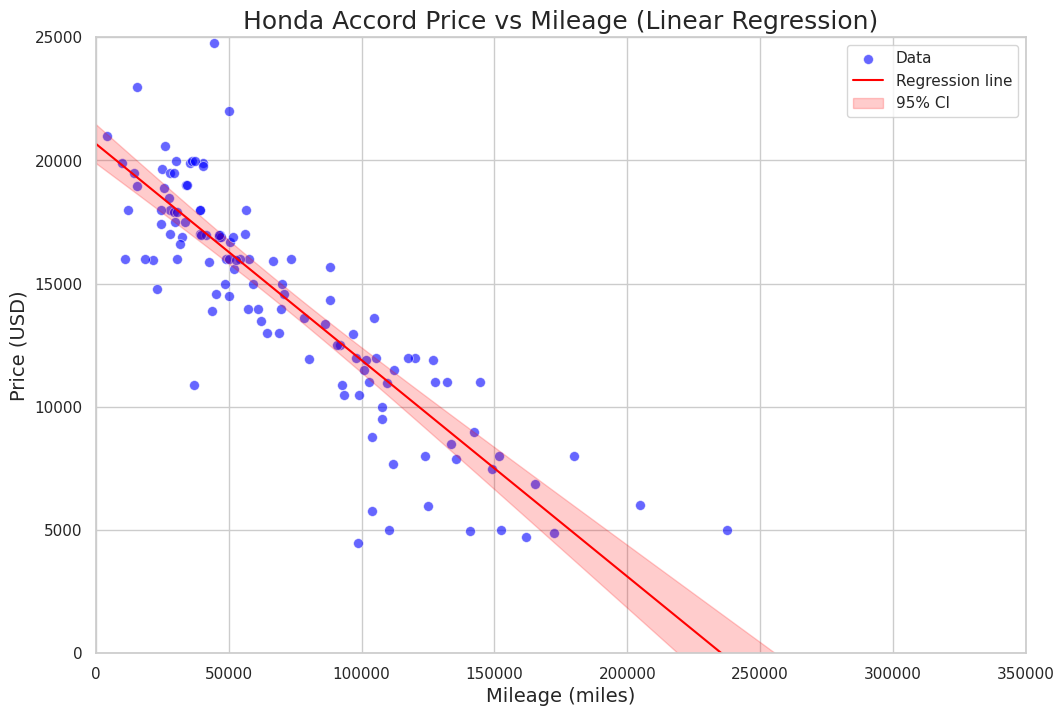

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Scatter plot with regression line and confidence interval
plt.figure(figsize=(12, 8))

# Plot the raw data
sns.scatterplot(x='mileage', y='price', data=accords, color='blue', alpha=0.6, s=50, label='Data')

# Create points for regression line
mileage_range = np.linspace(0, 350000, 100)
X_line = sm.add_constant(pd.DataFrame({'mileage': mileage_range}))
y_pred = model.predict(X_line)

# Confidence interval for the regression line
prediction = model.get_prediction(X_line)
pred_summary = prediction.summary_frame(alpha=0.05)
ci_lower = pred_summary['mean_ci_lower']
ci_upper = pred_summary['mean_ci_upper']

# Plot regression line
plt.plot(mileage_range, y_pred, color='red', label='Regression line')

# Plot confidence band
plt.fill_between(mileage_range, ci_lower, ci_upper, color='red', alpha=0.2, label='95% CI')

# Formatting
plt.title('Honda Accord Price vs Mileage (Linear Regression)', fontsize=18)
plt.xlabel('Mileage (miles)', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.xlim(0, 350000)
plt.ylim(0, 25000)
plt.legend()
plt.grid(True)
plt.show()


## 🚀 Exercise 5

Address the issue illustrated in Exercises 3 and 4 by refitting your model with a log-transformed outcome.

Use your new model to predict the price (in dollars) of a Honda Accord with a mileage of 50,000 and a mileage of 300,000. **Print the new predicted prices.**

In [26]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Log-transform the outcome
y_log = np.log(accords['price'])
X = sm.add_constant(accords['mileage'])  # add intercept

# Fit the linear regression model: log(price) ~ mileage
log_model = sm.OLS(y_log, X).fit()
print(log_model.summary())

# Predict price for mileage = 50,000
X_new_50k = pd.DataFrame([[1, 50000]], columns=log_model.model.exog_names)
log_pred_50k = log_model.get_prediction(X_new_50k).summary_frame(alpha=0.05)
price_50k = np.exp(log_pred_50k['mean'][0])  # back-transform to dollars

# Predict price for mileage = 300,000
X_new_300k = pd.DataFrame([[1, 300000]], columns=log_model.model.exog_names)
log_pred_300k = log_model.get_prediction(X_new_300k).summary_frame(alpha=0.05)
price_300k = np.exp(log_pred_300k['mean'][0])  # back-transform to dollars

# Print results
print(f"Predicted price for 50,000 miles: ${price_50k:.2f}")
print(f"Predicted price for 300,000 miles: ${price_300k:.2f}")


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     356.2
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           1.01e-37
Time:                        05:51:06   Log-Likelihood:                 23.725
No. Observations:                 122   AIC:                            -43.45
Df Residuals:                     120   BIC:                            -37.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0325      0.033    302.631      0.0

## 🚀 Exercise 6

Graphically present your regression model from Exercise 5. Specifically, plot the data with
a scatter plot, and include a regression line with the corresponding confidence bands.

- Make sure to adjust the limits of your plot so you can see that the issue you identified earlier is now fixed.

- Format your plot nicely!

- Note that the new model can be plotted in R using the `geom_smooth` function with the following arguments:

`geom_smooth(method = "glm", formula = y~x, method.args = list(family = gaussian(link = 'log')))`

> Note: `geom_smooth(method='lm', formula=log(y)~x)` will also plot the correct model (with much prettier and clearer syntax!). However, it puts the model on a logarithmic y-scale instead of a standard numeric scale.
>
> Alternatively, you could use `geom_line()` with a dataset consisting of many possible mileage values (e.g., 0 through 350,000) along with the corresponding predictions  from your new model.

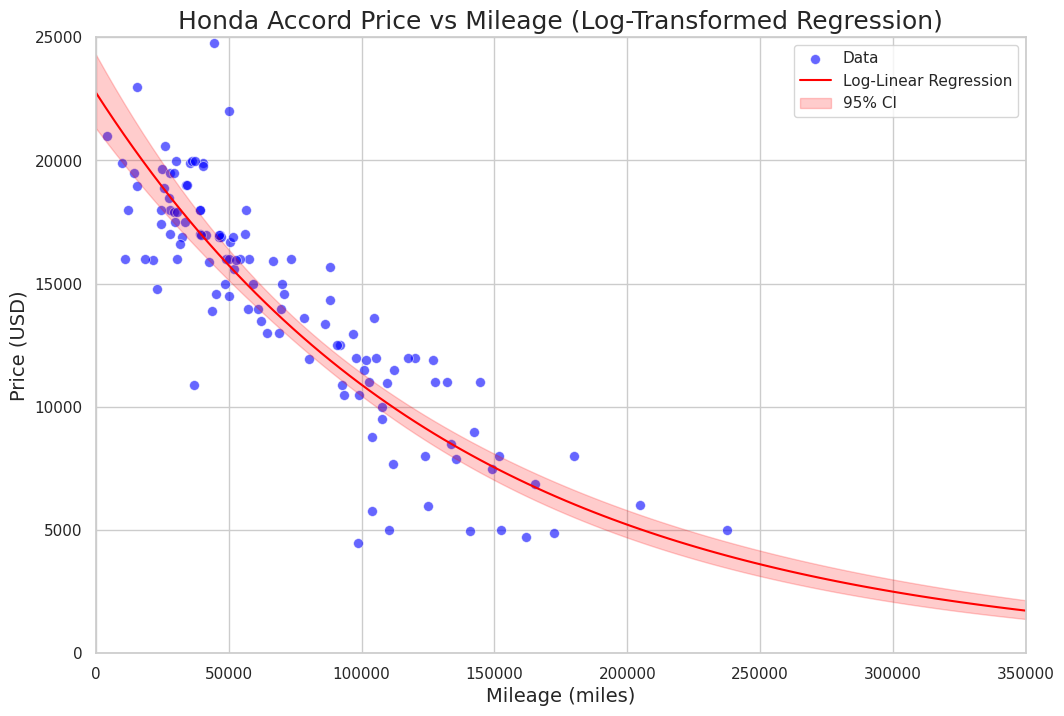

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Scatter plot of actual data
plt.figure(figsize=(12, 8))
sns.scatterplot(x='mileage', y='price', data=accords, color='blue', alpha=0.6, s=50, label='Data')

# Generate mileage values for plotting
mileage_range = np.linspace(0, 350000, 100)
X_plot = pd.DataFrame([[1, m] for m in mileage_range], columns=log_model.model.exog_names)

# Predicted log(price)
log_pred = log_model.get_prediction(X_plot)
pred_summary = log_pred.summary_frame(alpha=0.05)

# Back-transform to original price scale
y_pred = np.exp(pred_summary['mean'])
ci_lower = np.exp(pred_summary['mean_ci_lower'])
ci_upper = np.exp(pred_summary['mean_ci_upper'])

# Plot regression line
plt.plot(mileage_range, y_pred, color='red', label='Log-Linear Regression')

# Plot confidence band
plt.fill_between(mileage_range, ci_lower, ci_upper, color='red', alpha=0.2, label='95% CI')

# Formatting
plt.title('Honda Accord Price vs Mileage (Log-Transformed Regression)', fontsize=18)
plt.xlabel('Mileage (miles)', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.xlim(0, 350000)
plt.ylim(0, 25000)
plt.legend()
plt.grid(True)
plt.show()




## 🚀 Exercise 7

Identify and interpret the following components of your log-transformed model:

- $\exp(\hat{\beta}_0)$
- $\exp(\hat{\beta}_1)$
- $\text{R}^2$

Interpret $\exp(\hat{\beta}_1)$ in terms of **an increase in 10,000 miles**, not an increase of 1 mile.

Tip: Use the `coef` function to extract the model coefficients from your model object.

In [28]:

import numpy as np

# Extract coefficients
beta0_log = log_model.params['const']      # intercept
beta1_log = log_model.params['mileage']    # slope
r2_log = log_model.rsquared                 # R-squared

# Exponentiate coefficients
exp_beta0 = np.exp(beta0_log)
exp_beta1 = np.exp(beta1_log)

# Interpretation for 10,000 miles increase
exp_beta1_10k = np.exp(beta1_log * 10000)

# Print results
print(f"exp(β̂0) = {exp_beta0:.2f} dollars")
print(f"exp(β̂1) = {exp_beta1:.6f} per 1 mile")
print(f"For 10,000 miles increase: multiplicative effect = {exp_beta1_10k:.3f}")
print(f"R^2 = {r2_log:.3f}\n")


exp(β̂0) = 22754.22 dollars
exp(β̂1) = 0.999993 per 1 mile
For 10,000 miles increase: multiplicative effect = 0.929
R^2 = 0.748




---

The value of $\exp(\hat{\beta}_0)$ with units: 22754.22 dollars

Interpretation: If a Honda Accord had zero miles, the predicted price would be approximately exp(β₀) dollars (mathematical intercept; not realistic)

---

The value of $\exp(\hat{\beta}_1)$ with units: 0.999993 per mile

Interpretation: For each additional mile, the expected price is multiplied by exp(β₁) (~slightly less than 1), i.e., it decreases slightly per mile

---

The value of $\text{R}^2$ with units:.748

Interpretation: On the log(price) scale, this proportion(74.8%) of the variation in log(price) is explained by mileage.

---

## 🚀 Exercise 8

Refine your regression model from Exercise 5 to include the model year as an additional predictor. You should still use just the Honda Accord data.

In one sentence, compare the $R^2$ of the revised regression model to your model from Exercise 5.

In [29]:
# Include model year as an additional predictor
X_year = sm.add_constant(accords[['mileage', 'year']])  # add intercept
y_log = np.log(accords['price'])

# Fit log-linear regression with mileage + year
log_model_year = sm.OLS(y_log, X_year).fit()
print(log_model_year.summary())

# Compare R-squared
r2_old = log_model.rsquared
r2_new = log_model_year.rsquared
print(f"R² old model (mileage only): {r2_old:.3f}")
print(f"R² new model (mileage + year): {r2_new:.3f}")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     373.8
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           4.93e-52
Time:                        05:52:03   Log-Likelihood:                 60.761
No. Observations:                 122   AIC:                            -115.5
Df Residuals:                     119   BIC:                            -107.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -122.9795     13.342     -9.217      0.0

---

The revised regression model that includes model year has a higher R² than the mileage-only model from Exercise 5, indicating that adding the car's year helps explain more variation in the log(price) of used Honda Accords.


---

## 🚀 Exercise 9

Fit the model from Exercise 8
**the entire dataset**, not just the Honda Accords.
You'll notice that the new $R^2$ is lower than the $R^2$ from the model from Exercise 8.
In one sentence, what is the likely reason for this difference?

In [30]:
# Prepare predictors for the full dataset
X_full = sm.add_constant(cars[['mileage', 'year']])
y_log_full = np.log(cars['price'])

# Fit the model on all cars
log_model_full = sm.OLS(y_log_full, X_full).fit()
print(log_model_full.summary())

# Compare R-squared
print(f"R² for full dataset: {log_model_full.rsquared:.3f}")



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     1208.
Date:                Tue, 18 Nov 2025   Prob (F-statistic):          1.13e-295
Time:                        05:52:33   Log-Likelihood:                -208.30
No. Observations:                1286   AIC:                             422.6
Df Residuals:                    1283   BIC:                             438.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -147.3908      9.008    -16.363      0.0

---

R² drops when using the full dataset because different makes and models have widely varying prices that cannot be captured by only mileage and year.


---

## 🚀 Exercise 10

Update the model from Exercise 9 to address the likely reason for the much smaller $R^2$.

- In this new model, what's the interpretation of the exponentiated intercept term?

- What is one change you could make to your model to make the intercept term more interpretable?

Answer in no more than three sentences.

In [31]:
# Center mileage and year
cars['mileage_centered'] = cars['mileage'] - cars['mileage'].mean()
cars['year_centered'] = cars['year'] - cars['year'].mean()

# Create dummy variables for make and model
X_full_refined = pd.get_dummies(cars[['mileage_centered', 'year_centered', 'make', 'model']], drop_first=True)

# Ensure all columns are numeric
X_full_refined = X_full_refined.astype(float)

# Add intercept
X_full_refined = sm.add_constant(X_full_refined)

# Log-transform price
y_log_full = np.log(cars['price'])

# Fit the refined log-linear model
log_model_refined = sm.OLS(y_log_full, X_full_refined).fit()
print(log_model_refined.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     1238.
Date:                Tue, 18 Nov 2025   Prob (F-statistic):               0.00
Time:                        05:52:57   Log-Likelihood:                 691.86
No. Observations:                1286   AIC:                            -1360.
Df Residuals:                    1274   BIC:                            -1298.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                8.5083      0.004  

---



1.The exponentiated intercept (exp(const) ≈ $4,950) represents the predicted price for a car with average mileage, average year, and the baseline categories of make and model (the reference levels from the dummy encoding).

2.This intercept is more interpretable because mileage and year were centered, so it corresponds to an “average” car rather than a car with 0 mileage and year 0.

3.To further improve interpretability, you could choose a meaningful reference category for make and model (e.g., the most common or typical car), so the intercept corresponds to a realistic baseline car.







---

# 🚀 Exercise 11

Implement your suggested change from Exercise 10, and print the resulting model output.

What's the interpretation of the exponentiated intercept term? Answer in one sentence.

What's the interpretation of the term for the model year? Answer in one sentence.

In [32]:
# Check current categories first
print(cars['make'].unique())
print(cars['model'].unique())

# Choose reference categories (for example, 'Honda' for make, 'Accord' for model)
# Then create dummies with drop_first=True to set references automatically
X_full_refined2 = pd.get_dummies(
    cars[['mileage_centered', 'year_centered', 'make', 'model']],
    drop_first=True  # first category in each column is reference
)

# Ensure numeric
X_full_refined2 = X_full_refined2.astype(float)

# Add intercept
X_full_refined2 = sm.add_constant(X_full_refined2)

# Log-transform price
y_log_full = np.log(cars['price'])

# Fit final model
log_model_final = sm.OLS(y_log_full, X_full_refined2).fit()
print(log_model_final.summary())

['Acura' 'Audi' 'BMW' 'Cadillac' 'Honda' 'Infiniti' 'Lexus' 'Volkswagen']
['TL' 'MDX' 'A4' '3 Series' 'CTS' 'Accord' 'Civic' 'G Sedan' 'RX 350'
 'Jetta']
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     1238.
Date:                Tue, 18 Nov 2025   Prob (F-statistic):               0.00
Time:                        05:53:16   Log-Likelihood:                 691.86
No. Observations:                1286   AIC:                            -1360.
Df Residuals:                    1274   BIC:                            -1298.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P

---

**Exponentiated intercept:**
It represents the predicted price (in dollars) of a car with average mileage, average year, and the baseline make and model (the reference categories from the dummy encoding).

**Model year coefficient**:
The coefficient for model year represents the multiplicative effect on price for each additional year, holding mileage and car type constant; specifically, exp(coef) tells how much the price changes proportionally per extra year.


---